In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import os

RESULT_DIR = '../results'
FIG_DIR = f'{RESULT_DIR}/figs'
os.makedirs(FIG_DIR, exist_ok=True)


# Clean data import phase
df = pd.read_csv("../data/dataCombined.csv")
df.head()

In [ ]:
# Constants for each section prefix
DEMOGRAPHICS = "D_"
USAGE = "U_"
ADOPTION = "A_"
FACTORS = "F_"
PROJECT_DELIVERY = "P_"
SUSTAINABILITY = "S_"
BARRIERS = "B_"


PLOT_PALATTE = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

In [ ]:
# Frequency tables for categorical data
demographic_cols = [col for col in df.columns if col.startswith(DEMOGRAPHICS)]
usage_cols = [col for col in df.columns if col.startswith(USAGE)]

for col in demographic_cols + usage_cols:
    print(f"\n--- Frequency Table: {col} ---")
    print(df[col].value_counts().sort_index())

## Data summary

In [ ]:
likert_cols = [col for col in df.columns if col.startswith((ADOPTION, FACTORS, PROJECT_DELIVERY, SUSTAINABILITY, BARRIERS))]

means = df[likert_cols].mean()
medians = df[likert_cols].median()
modes = df[likert_cols].mode().iloc[0]

summary = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

summary.head(10)

### Frequency plot function

In [ ]:
def plot_categorical_distribution(
    df, 
    column, 
    x_labels_dict,
    x_label='Category', 
    y_label='Frequency', 
    title='Distribution', 
    filename='output.png',
):
        
    categories_present = sorted(df[column].dropna().unique())

    labels = [x_labels_dict[val] for val in categories_present]
    palette = sns.color_palette("pastel", n_colors=len(labels))

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=column, data=df, order=categories_present, palette=palette)

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=10)

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, weight='bold')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                int(height), ha="center", fontsize=9)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine()
    plt.tight_layout()

    plt.savefig(f"{FIG_DIR}/{filename}", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Frequency plots for Demographic fields

In [ ]:

gender_labels_dict = {
    1: "Male",
    2: "Female"
}
plot_categorical_distribution(
    df=df,
    column="D_Gender",
    x_labels_dict=gender_labels_dict,
    x_label="Gender",
    y_label="Number of Respondents",
    title="Gender Distribution",
    filename="gender_distribution.png"
)
age_labels_dict = {
    1: "<20", 
    2: "21-30", 
    3: "31-40", 
    4: "41-50", 
    5: "Over 50"
}
plot_categorical_distribution(
    df=df,
    column="D_Age",
    x_labels_dict=age_labels_dict,
    x_label="Age Group",
    y_label="Number of Respondents",
    title="Age Distribution",
    filename="age_distribution.png"
)
education_labels_dict = {
    1: "OND",
    2: "B.Sc./HND",
    3: "PGD",
    4: "MSc.",
    5: "Ph.D."
}
plot_categorical_distribution(
    df=df,
    column="D_Education",
    x_labels_dict=education_labels_dict,
    x_label="Educational Qualification",
    y_label="Number of Respondents",
    title="Educational Qualification Distribution",
    filename="education_distribution.png"
)
position_labels_dict = {
    1: "Junior Staff",
    2: "Senior Staff"
}
plot_categorical_distribution(
    df=df,
    column="D_Position",
    x_labels_dict=position_labels_dict,
    x_label="Staff Position",
    y_label="Number of Respondents",
    title="Position Distribution",
    filename="position_distribution.png"
)
experience_labels_dict = {
    1: "<5 years",
    2: "6-10 years",
    3: "11-15 years",
    4: "16-20 years",
    5: "Over 20 years"
}
plot_categorical_distribution(
    df=df,
    column="D_Experience",
    x_labels_dict=experience_labels_dict,
    x_label="Years of Experience",
    y_label="Number of Respondents",
    title="Experience Distribution",
    filename="experience_distribution.png"
)
company_age_labels_dict = {
    1: "1-5 years",
    2: "6-10 years",
    3: "11-15 years",
    4: "16-20 years",
    5: "Over 20 years"
}
plot_categorical_distribution(
    df=df,
    column="D_CompanyAge",
    x_labels_dict=company_age_labels_dict,
    x_label="Company Age",
    y_label="Number of Respondents",
    title="Company Age Distribution",
    filename="company_age_distribution.png"
)
employee_count_labels_dict = {
    1: "1-5",
    2: "6-10",
    3: "11-15",
    4: "16-20",
    5: "Above 20"
}
plot_categorical_distribution(
    df=df,
    column="D_NumEmployees",
    x_labels_dict=employee_count_labels_dict,
    x_label="Number of Employees",
    y_label="Number of Respondents",
    title="Employee Count Distribution",
    filename="employee_count_distribution.png"
)



#Area plot for Usage fields
usage_cols = [col for col in df.columns if col.startswith(USAGE)]

usage_distribution = pd.DataFrame(index=range(1, 6))

for col in usage_cols:
    counts = df[col].value_counts().reindex(range(1, 6), fill_value=0)
    usage_distribution[col] = counts

plt.figure(figsize=(12, 6))
for col in usage_distribution.columns:
    plt.fill_between(usage_distribution.index, usage_distribution[col], alpha=0.15)
    plt.plot(usage_distribution.index, usage_distribution[col], label=col)

plt.title("Digital Technology Usage Distribution", fontsize=14, weight='bold')
plt.xlabel("Response Level (1 = Very High ... 5 = Very Low)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=9)
sns.despine()
plt.tight_layout()

plt.savefig(f"{FIG_DIR}/usage_area_chart.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


# Data Reliability and Validity
### Cronbach’s Alpha for Reliability
To access internal consistency of sections

In [ ]:
#data reliability and validity
import pingouin as pg
adoption_cols = [col for col in df.columns if col.startswith(ADOPTION)]
project_delivery_cols = [col for col in df.columns if col.startswith(PROJECT_DELIVERY)]
sustainability_cols = [col for col in df.columns if col.startswith(SUSTAINABILITY)]
barriers_cols = [col for col in df.columns if col.startswith(BARRIERS)]


a_alpha, a_ci = pg.cronbach_alpha(data=df[adoption_cols])
p_alpha, p_ci = pg.cronbach_alpha(data=df[project_delivery_cols])
s_alpha, s_ci = pg.cronbach_alpha(data=df[sustainability_cols])
b_alpha, b_ci = pg.cronbach_alpha(data=df[barriers_cols])

print(f"Cronbach's alpha for adoption = {a_alpha:.3f} (95% CI: {a_ci[0]:.3f} - {a_ci[1]:.3f})")
print(f"Cronbach's alpha for project delivery = {p_alpha:.3f} (95% CI: {p_ci[0]:.3f} - {p_ci[1]:.3f})")
print(f"Cronbach's alpha for sustainability = {s_alpha:.3f} (95% CI: {s_ci[0]:.3f} - {s_ci[1]:.3f})")
print(f"Cronbach's alpha for barriers = {b_alpha:.3f} (95% CI: {b_ci[0]:.3f} - {b_ci[1]:.3f})")


# Exploratory Factor Analysis (EFA)
Exploratory Factor Analysis (EFA) is a key step in identifying underlying latent variables that explain the observed correlations between measured variables. We will use this to interpret the loadings.

In [ ]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler


### Factor Analysis Function

In [ ]:
def run_factor_analysis(df, cols, n_factors=5, rotation='varimax'):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[cols])

    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation)
    fa.fit(scaled_data)

    eigenvalues = fa.get_eigenvalues()
    loadings = fa.loadings_

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
    plt.title(f"Scree Plot for {', '.join(cols)}")
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.show()

    loadings_df = pd.DataFrame(loadings, index=cols)
    print(f'Factor Loadings for {", ".join(cols)}:\n', loadings_df)

    return fa, loadings_df

### Factor Analysis

In [ ]:
fa_adoption, loadings_adoption = run_factor_analysis(df, adoption_cols)
fa_project_delivery, loadings_project_delivery = run_factor_analysis(df, project_delivery_cols)
fa_sustainability, loadings_sustainability = run_factor_analysis(df, sustainability_cols)
fa_barriers, loadings_barriers = run_factor_analysis(df, barriers_cols)

## Principal Component Analysis (PCA)
PCA reduces the dimensionality of the data while retaining as much variance as possible

In [ ]:
from sklearn.decomposition import PCA

### PCA function

In [ ]:
def run_pca(df, cols, n_components=5):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[cols])

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)

    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title(f"Explained Variance by Principal Components for {', '.join(cols)}")
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.show()

    return pca, explained_variance, pca_result


### PCA's

In [ ]:
pca_adoption, explained_variance_adoption, pca_result_adoption = run_pca(df, adoption_cols)
pca_project_delivery, explained_variance_project_delivery, pca_result_project_delivery = run_pca(df, project_delivery_cols)
pca_sustainability, explained_variance_sustainability, pca_result_sustainability = run_pca(df, sustainability_cols)
pca_barriers, explained_variance_barriers, pca_result_barriers = run_pca(df, barriers_cols)

### Factor Loadings Visualization

In [ ]:
def plot_factor_loadings(loadings_df, title='Factor Loadings'):
    plt.figure(figsize=(10, min(0.5 * len(loadings_df), 12)))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel("Factors")
    plt.ylabel("Items")
    plt.tight_layout()
    plt.show()

plot_factor_loadings(loadings_adoption, title="Adoption - Factor Loadings")
plot_factor_loadings(loadings_project_delivery, title="Project delivery - Factor Loadings")
plot_factor_loadings(loadings_sustainability, title="Sustainability - Factor Loadings")
plot_factor_loadings(loadings_barriers, title="Barriers - Factor Loadings")

### PCA Biplot for 2D Projection

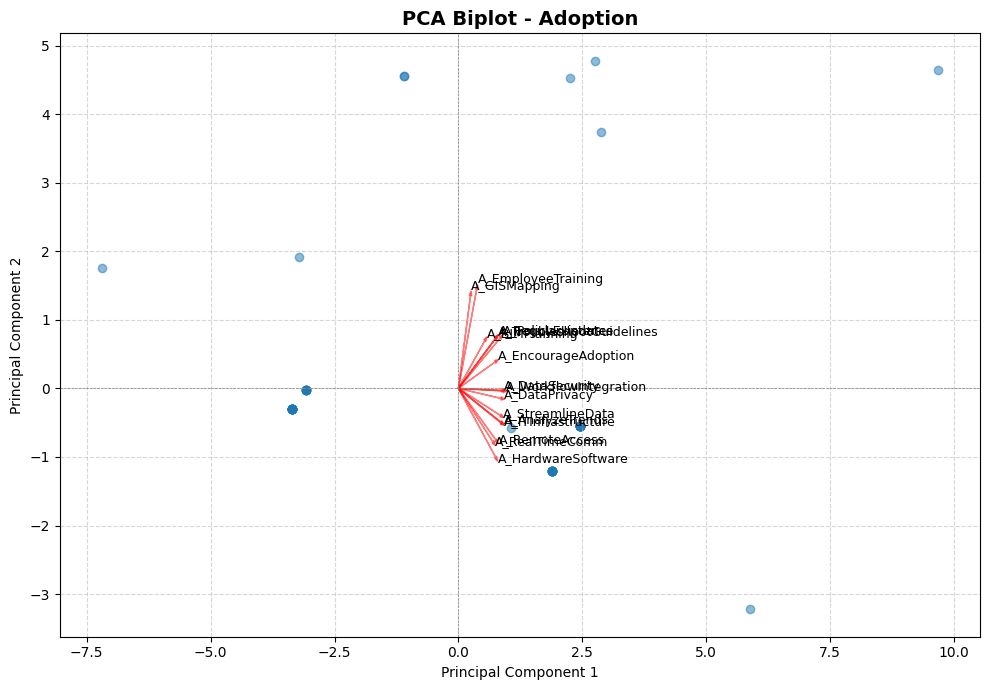

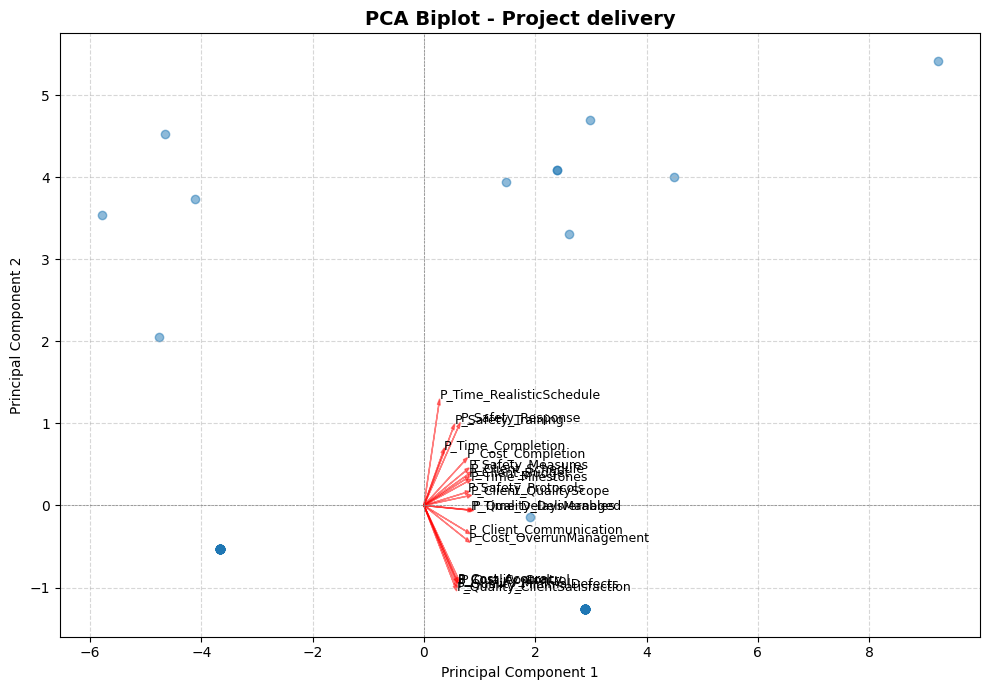

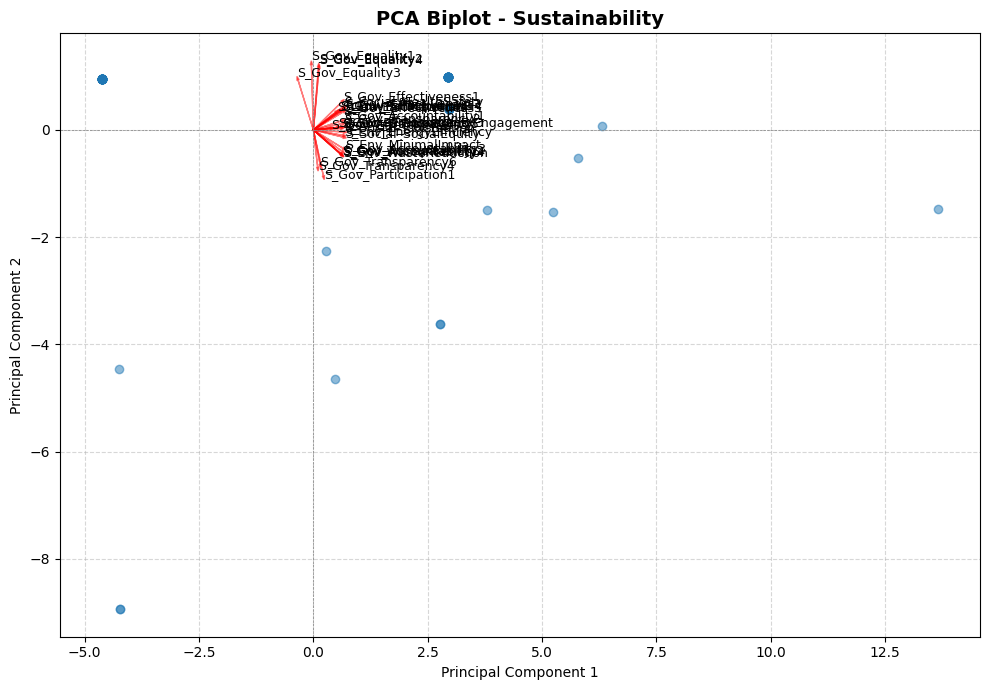

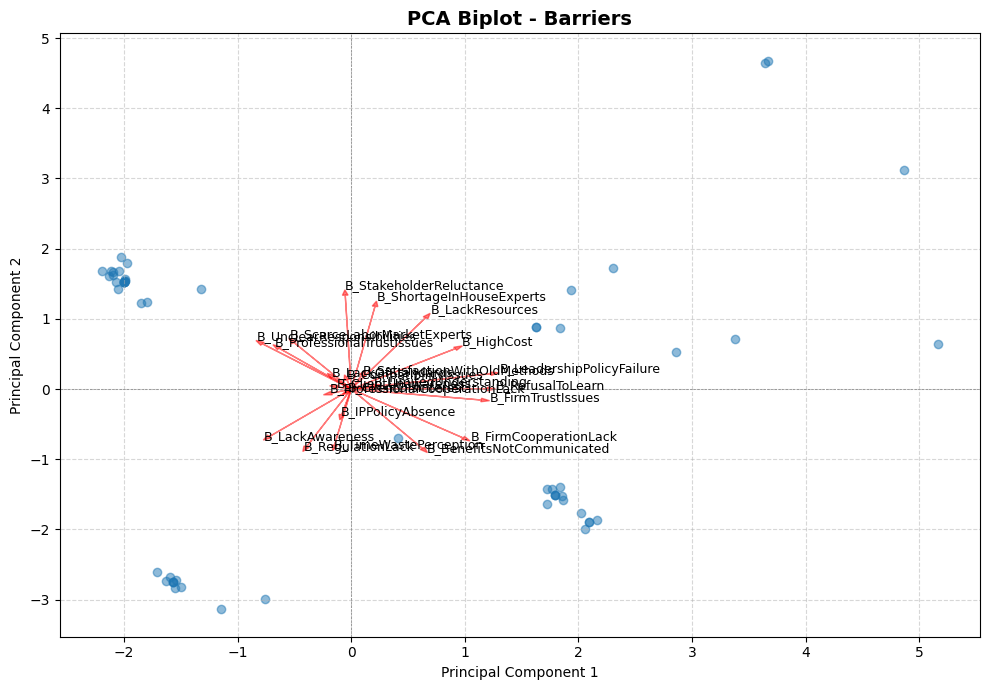

In [38]:
def pca_biplot(pca, components, features, labels=None, title='PCA Biplot'):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(components[:, 0], components[:, 1], alpha=0.5, label='Respondents')
    
    feature_vectors = pca.components_[:2].T 
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0]*3, v[1]*3, 
                  color='r', alpha=0.5, head_width=0.05)
        plt.text(v[0]*3.2, v[1]*3.2, labels[i] if labels else f"Var{i+1}", 
                 color='black', fontsize=9)

    plt.axhline(0, linestyle='--', color='gray', linewidth=0.5)
    plt.axvline(0, linestyle='--', color='gray', linewidth=0.5)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title, fontsize=14, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
pca_biplot(
    pca=pca_adoption,
    components=pca_result_adoption,
    features=adoption_cols,
    labels=adoption_cols,
    title="PCA Biplot - Adoption"
)

pca_biplot(
    pca=pca_project_delivery,
    components=pca_result_project_delivery,
    features=project_delivery_cols,
    labels=project_delivery_cols,
    title="PCA Biplot - Project delivery"
)

pca_biplot(
    pca=pca_sustainability,
    components=pca_result_sustainability,
    features=sustainability_cols,
    labels=sustainability_cols,
    title="PCA Biplot - Sustainability"
)

pca_biplot(
    pca=pca_barriers,
    components=pca_result_barriers,
    features=barriers_cols,
    labels=barriers_cols,
    title="PCA Biplot - Barriers"
)
